In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = Path().resolve().parent
BASE_DIR

WindowsPath('C:/Users/Sadegh/code/nencki-image-segmentation')

In [3]:
CSV_DIR = BASE_DIR / "data/features_final"
CSV_DIR

WindowsPath('C:/Users/Sadegh/code/nencki-image-segmentation/data/features_final')

In [4]:
dfs = {}

for csv_file in CSV_DIR.glob('*.csv'):
    df_name = csv_file.stem
    dfs[df_name] = pd.read_csv(csv_file)

In [14]:
dfs['biopsy_1287_upper']

,Object ID,area,centroid-0,centroid-1,ROI,Image,CD45: Mean,CD45: Median,CD68: Mean,CD68: Median,TMEM119: Mean,TMEM119: Median,GPNMB: Mean,GPNMB: Median
0,1,971,2137.972194,18217.754892,upper,biopsy_1287_upper,5.792997,4.0,4.396498,3.0,8.647786,8.0,6.026777,6.0
1,2,6976,2404.906680,11903.338016,upper,biopsy_1287_upper,45.554472,25.0,34.387615,15.0,96.176749,64.0,1.329272,1.0
2,3,130,2808.930769,17003.361538,upper,biopsy_1287_upper,41.000000,29.0,1.146154,1.0,38.261538,25.0,0.000000,0.0
3,4,1731,3072.605430,12227.978625,upper,biopsy_1287_upper,3.456384,3.0,1.776430,1.0,4.164067,3.0,0.140959,0.0
4,5,1577,3135.093849,11833.707039,upper,biopsy_1287_upper,7.495244,7.0,2.194673,2.0,6.458465,5.0,0.325935,0.0
5,6,2026,3245.637216,20486.934847,upper,biopsy_1287_upper,1.674235,2.0,1.188055,1.0,3.040474,3.0,0.013820,0.0
6,7,416,3351.603365,11213.889423,upper,biopsy_1287_upper,15.838942,12.0,3.310096,3.0,21.670673,10.0,1.300481,1.0
7,8,2290,3396.946725,20587.127074,upper,biopsy_1287_upper,3.135371,3.0,2.921397,3.0,6.852838,7.0,0.006114,0.0
8,9,1062,3418.832392,19286.352166,upper,biopsy_1287_upper,3.622411,3.0,0.879473,1.0,8.360640,9.0,0.223164,0.0
9,10,131,4184.587786,16719.824427,upper,biopsy_1287_upper,37.572519,37.0,7.702290,6.0,112.137405,102.0,0.389313,0.0


In [19]:
markers = {
    "CD68": "CD68: Mean",
    "TMEM119": "TMEM119: Mean",
    "CD45": "CD45: Mean",
    "GPNMB": "GPNMB: Mean"
}

exclude_ids = {"2506", "2503", "4152", "4155", "4156", "17827"}

results = []

for file_name, df in dfs.items():

    patient_id = file_name.split(".")[0]

    # ---- Required for Problem 1 only ----
    required_p1 = ["CD68", "TMEM119", "CD45"]

    if not all(markers[m] in df.columns for m in required_p1):
        print(f"Skipping {patient_id}: missing required markers for Problem 1")
        continue

    # ---- Thresholds ----
    thresholds = {
        marker: df[markers[marker]].mean()
        for marker in required_p1
    }

    CD68_pos = df[markers["CD68"]] > thresholds["CD68"]
    TMEM119_pos = df[markers["TMEM119"]] > thresholds["TMEM119"]
    CD45_pos = df[markers["CD45"]] > thresholds["CD45"]

    # ---- Problem 1 ----
    triple_pos = CD68_pos & TMEM119_pos & CD45_pos
    tmem_neg = CD68_pos & (~TMEM119_pos) & CD45_pos

    total_area = len(df)

    triple_density = triple_pos.sum() / total_area
    tmem_neg_density = tmem_neg.sum() / total_area

    row = {
        "Patient": patient_id,
        "Triple_density": triple_density,
        "TMEM119neg_density": tmem_neg_density
    }

    # ---- Problem 2 (only if GPNMB exists) ----
    if (
        markers["GPNMB"] in df.columns
        and patient_id not in exclude_ids
        and CD45_pos.sum() > 0
    ):

        thresholds["GPNMB"] = df[markers["GPNMB"]].mean()
        GPNMB_pos = df[markers["GPNMB"]] > thresholds["GPNMB"]

        GPNMB_pos_MG = (GPNMB_pos & CD68_pos & TMEM119_pos & CD45_pos).sum()
        GPNMB_neg_MG = ((~GPNMB_pos) & CD68_pos & TMEM119_pos & CD45_pos).sum()
        GPNMB_pos_Mphi = (GPNMB_pos & CD68_pos & (~TMEM119_pos) & CD45_pos).sum()
        GPNMB_neg_Mphi = ((~GPNMB_pos) & CD68_pos & (~TMEM119_pos) & CD45_pos).sum()

        total_CD45 = CD45_pos.sum()

        row.update({
            "% GPNMB+ MG": 100 * GPNMB_pos_MG / total_CD45,
            "% GPNMB- MG": 100 * GPNMB_neg_MG / total_CD45,
            "% GPNMB+ MΦ": 100 * GPNMB_pos_Mphi / total_CD45,
            "% GPNMB- MΦ": 100 * GPNMB_neg_Mphi / total_CD45
        })

    results.append(row)

final_results = pd.DataFrame(results)
final_results

,Patient,Triple_density,TMEM119neg_density,% GPNMB+ MG,% GPNMB- MG,% GPNMB+ MΦ,% GPNMB- MΦ
0,biopsy_1287_upper,0.129032,0.129032,9.090909,27.272727,0.000000,36.363636
1,biopsy_1684_upper,0.132479,0.017094,25.414365,8.839779,3.314917,1.104972
2,biopsy_1686_bottom,0.086545,0.042182,23.300971,15.210356,5.177994,13.592233
3,biopsy_17827_bottom,0.124734,0.100550,NaN,NaN,NaN,NaN
4,biopsy_1991_bottom,0.093439,0.065606,22.758621,9.655172,16.551724,6.206897
5,biopsy_2087_upper,0.209446,0.014374,14.655172,29.310345,2.155172,0.862069
6,biopsy_2089_bottom,0.134921,0.047619,10.000000,32.500000,2.500000,12.500000
7,biopsy_2503_upper,0.070626,0.094703,NaN,NaN,NaN,NaN
8,biopsy_2506_bottom,0.082670,0.097578,NaN,NaN,NaN,NaN
9,biopsy_3149_upper,0.050402,0.204338,5.664133,6.026059,21.588853,25.805284


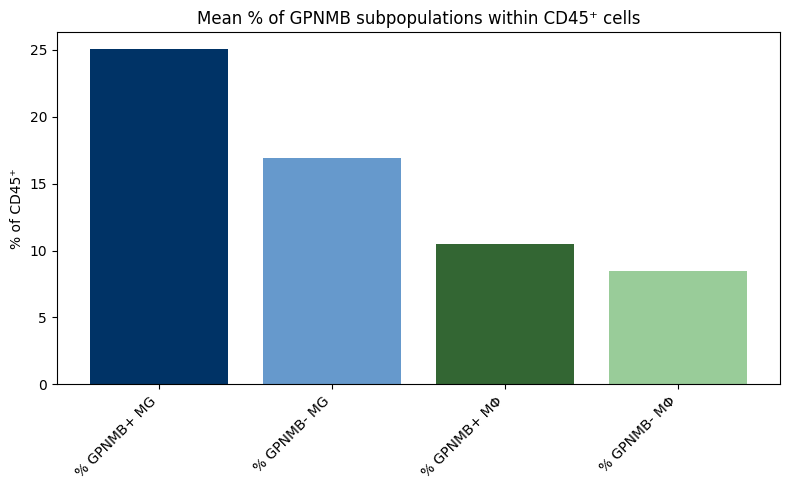

In [20]:
cols = ["% GPNMB+ MG", "% GPNMB- MG", "% GPNMB+ MΦ", "% GPNMB- MΦ"]

means = final_results[cols].mean()

colors = ['#003366', '#6699cc', '#336633', '#99cc99']

plt.figure(figsize=(8,5))
bars = plt.bar(means.index, means.values, color=colors)

plt.ylabel("% of CD45⁺")
plt.xticks(rotation=45, ha='right')
plt.title("Mean % of GPNMB subpopulations within CD45⁺ cells")
plt.tight_layout()

plt.show()


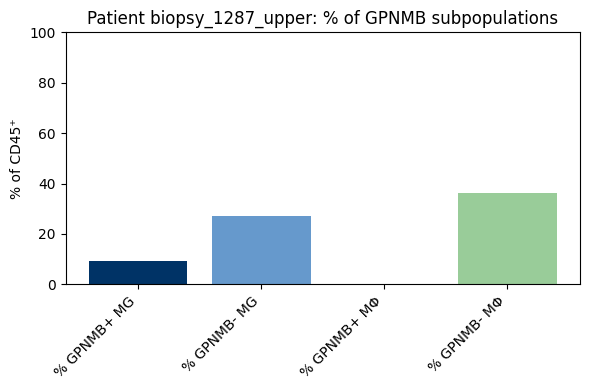

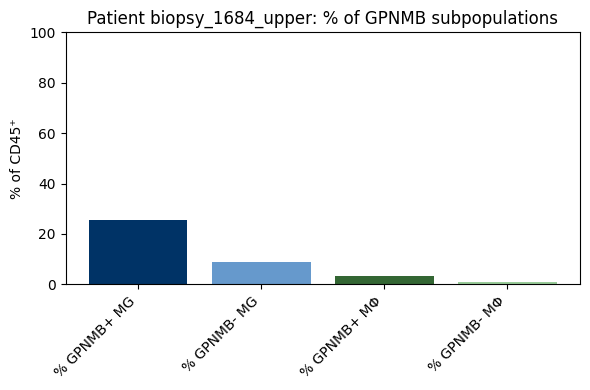

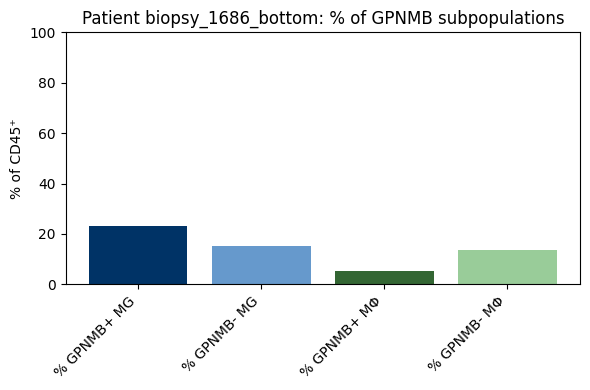

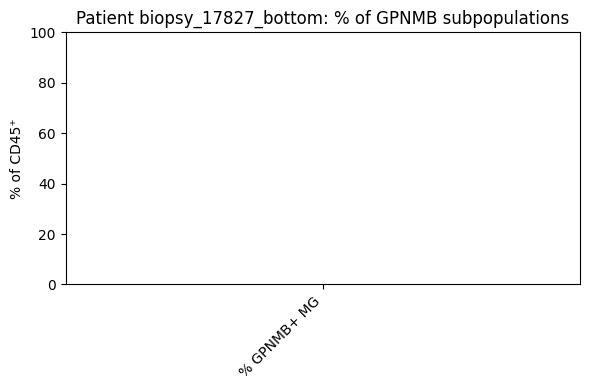

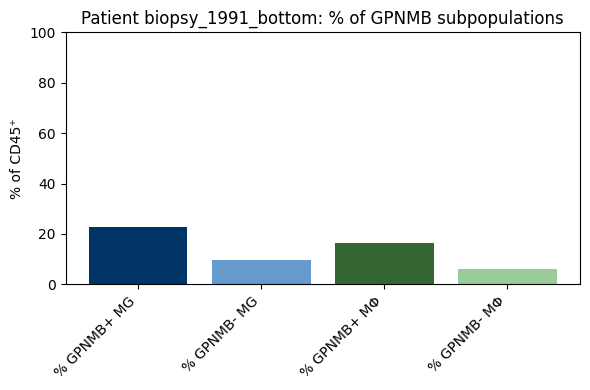

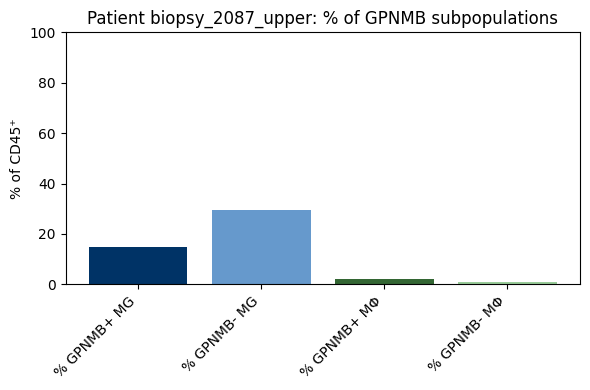

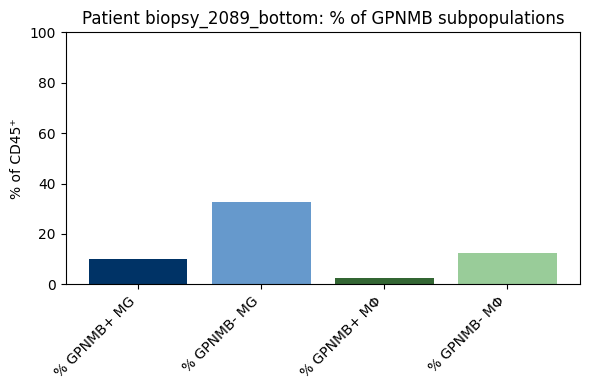

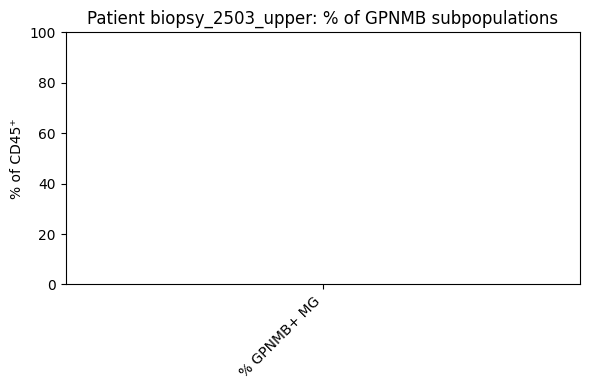

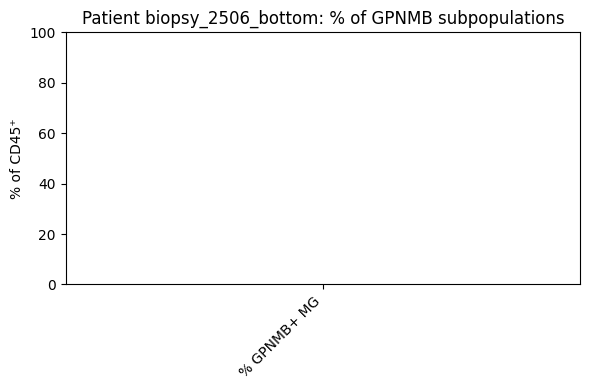

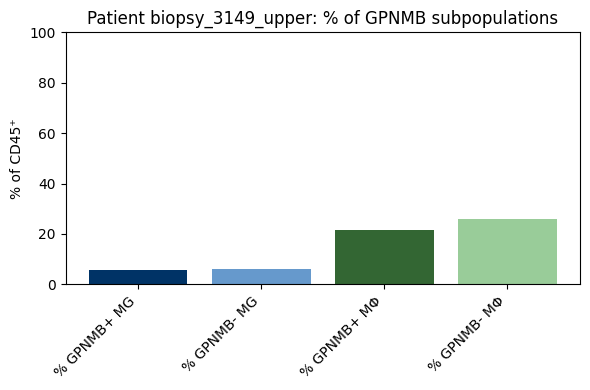

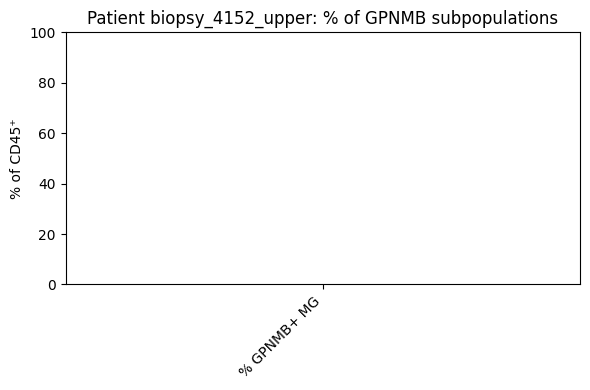

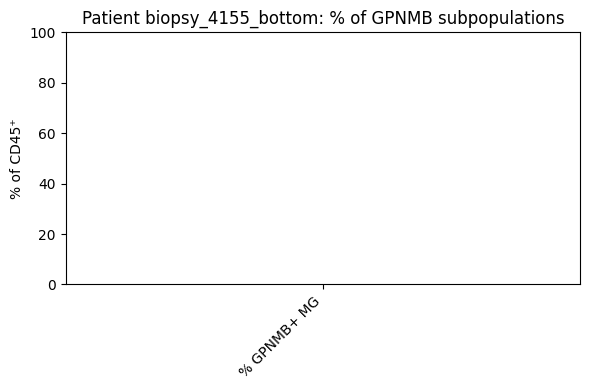

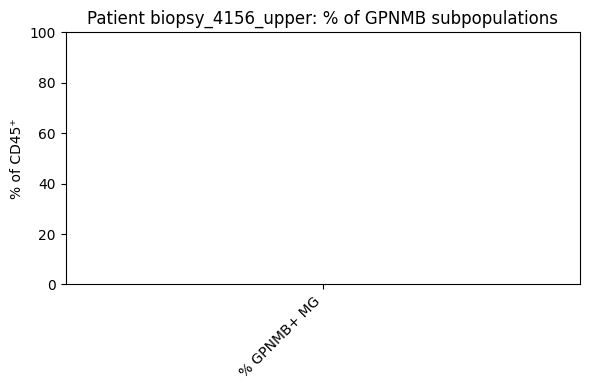

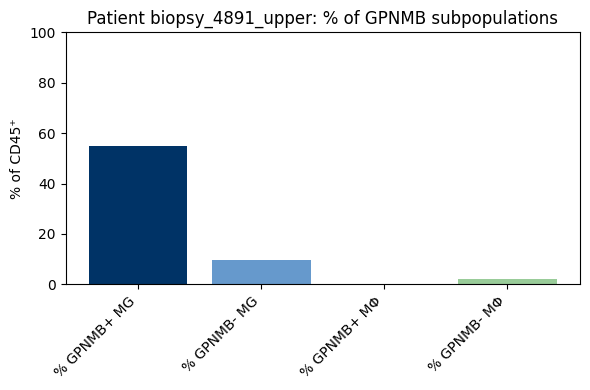

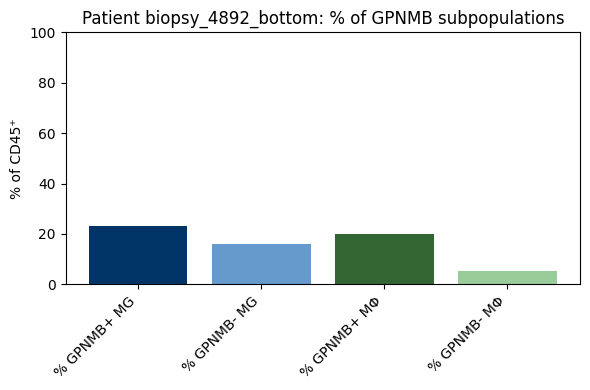

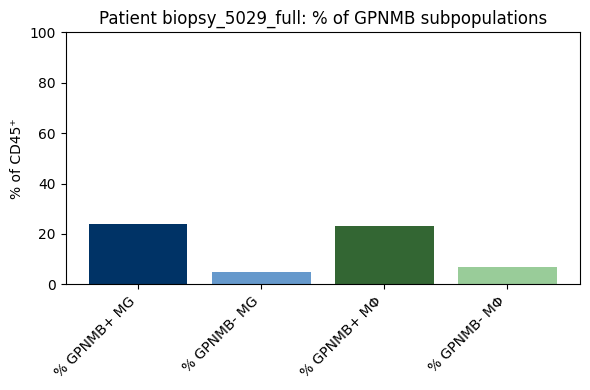

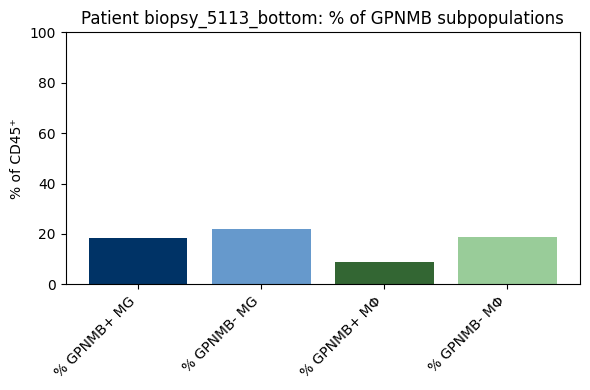

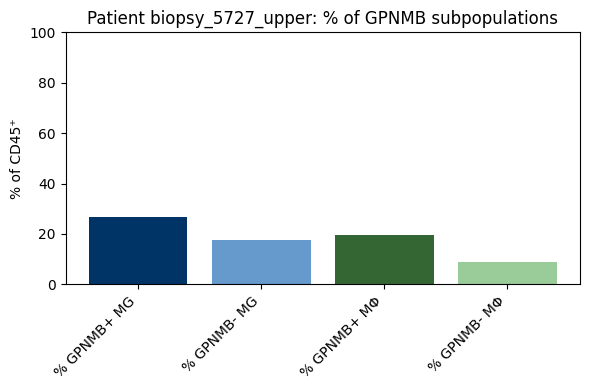

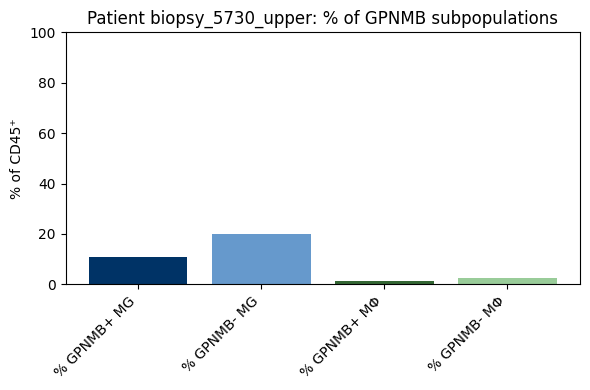

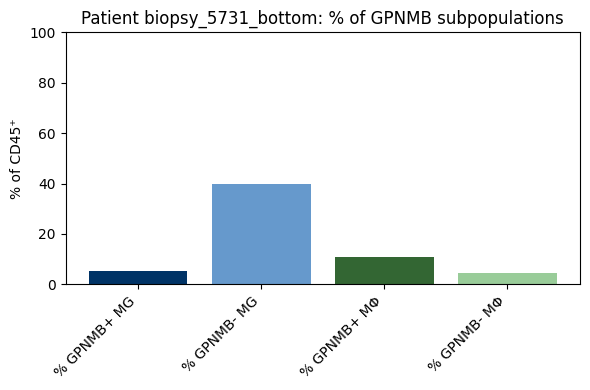

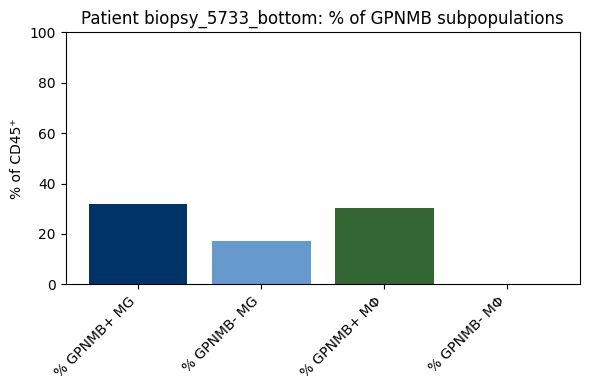

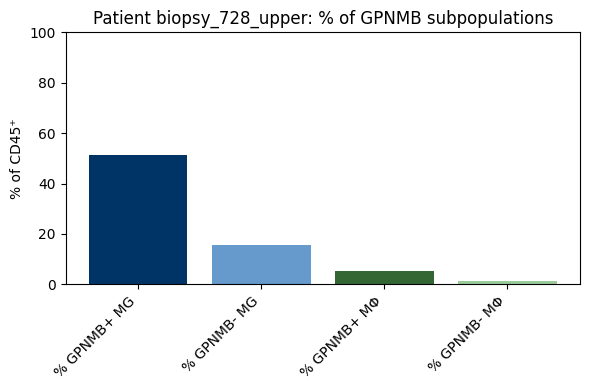

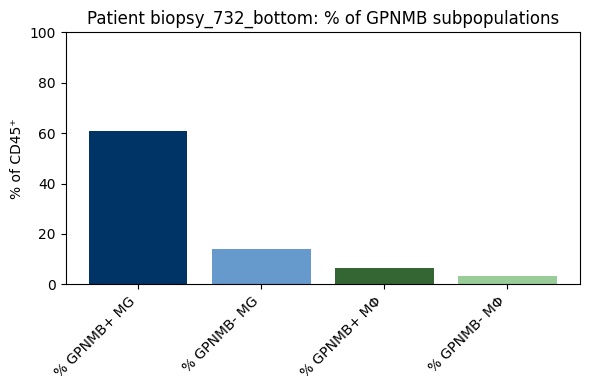

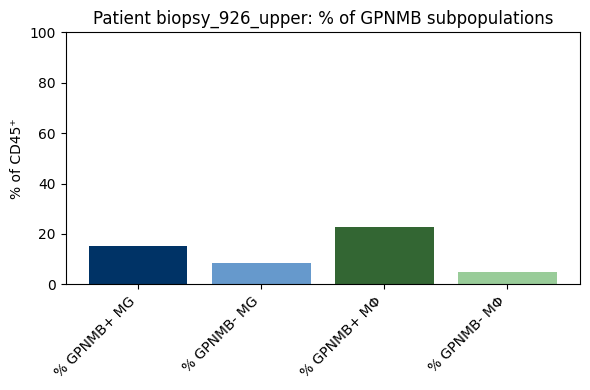

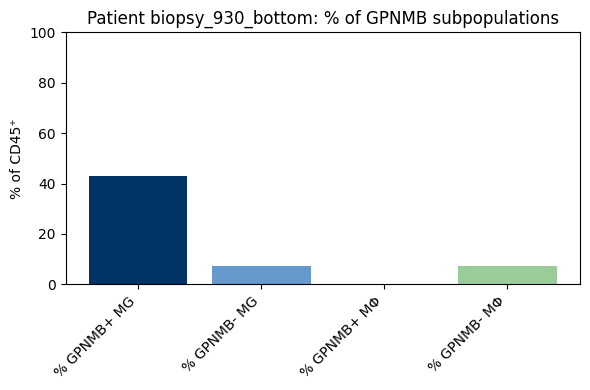

In [21]:
cols = ["% GPNMB+ MG", "% GPNMB- MG", "% GPNMB+ MΦ", "% GPNMB- MΦ"]
colors = ['#003366', '#6699cc', '#336633', '#99cc99']

for idx, row in final_results.iterrows():
    patient_id = row["Patient"]
    values = row[cols].values

    plt.figure(figsize=(6,4))
    plt.bar(cols, values, color=colors)
    plt.title(f"Patient {patient_id}: % of GPNMB subpopulations")
    plt.ylabel("% of CD45⁺")
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Single Biopsy Analysis

In [10]:
markers = ["GPNMB", "TMEM119", "CD68", "CD45"]
markers

['GPNMB', 'TMEM119', 'CD68', 'CD45']

In [8]:
len(list(dfs.keys()))

25

In [ ]:
df_2503 = dfs.get('biopsy_5731_bottom')
df_2503

In [ ]:
markers = {
    "CD68": "Cell: CD68: Mean",
    "TMEM119": "Cell: TMEM119: Mean",
    "CD45": "Cell: CD45: Mean",
    "GPNMB": "Cell: GPNMB: Mean"
}

thresholds = {k: df_2503[v].mean() for k, v in markers.items()}
thresholds

In [ ]:
df_pos = df_2503.copy()

for marker, col in markers.items():
    df_pos[marker + "_pos"] = df_2503[col] > thresholds[marker]

In [ ]:
cd45_pos_df = df_pos[df_pos["CD45_pos"]]
total_cd45 = len(cd45_pos_df)

In [ ]:
groups = {
    "GPNMB+ CD68+ TMEM119+ CD45+": (
        (cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB- CD68+ TMEM119+ CD45+": (
        (~cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB+ CD68+ TMEM119- CD45+": (
        (cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (~cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB- CD68+ TMEM119- CD45+": (
        (~cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (~cd45_pos_df["TMEM119_pos"])
    ),
}


In [ ]:
results = {
    name: (mask.sum() / total_cd45) * 100
    for name, mask in groups.items()
}

result_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["Percent_of_CD45"]
)
result_df

In [ ]:
plt.figure(figsize=(8, 5))

plt.bar(
    result_df.index,
    result_df["Percent_of_CD45"],
    color="steelblue",
    edgecolor="black"
)

plt.ylabel("% of CD45")
plt.xticks(rotation=45, ha="right")
plt.title("GPNMB / CD68 / TMEM119 populations")
plt.tight_layout()
plt.show()
